<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/Deepnoid_Lecuture04_YOLO_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1. colab 환경 살펴보기

In [ ]:
#import modules we need
#본 실습은 텐서플로우 2.0 이상의 버전의 환경에서 진행됩니다.
import numpy as np
import tensorflow as tf
import os
from PIL import Image

텐서플로우 버전 체크(2.0 이상)



In [ ]:
print(tf.__version__)

2.4.1


colab에 파일을 업로드 해보자

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cat.jpg to cat.jpg


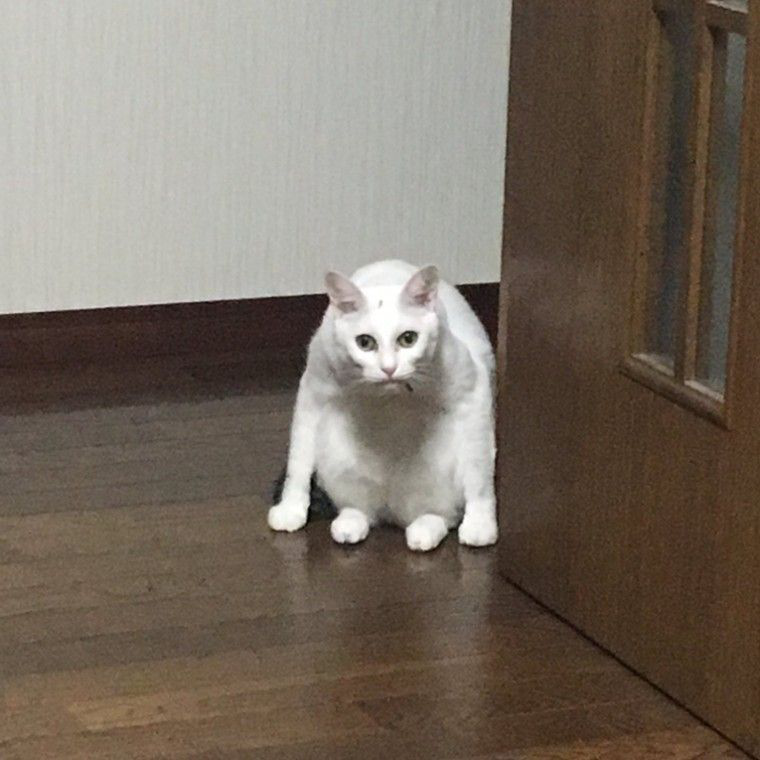

In [ ]:
#저장된 이미지 이름을 불러와서 열어보자
Image.open('cat.jpg')

# Chapter 2. Darknet 가져와서 실행만 시켜보기!
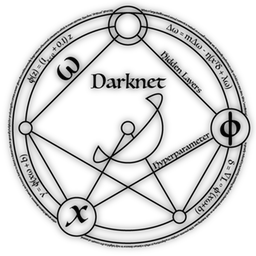

Darknet 이란? YOLO 논문의 저자 조셉 레드몬이 만든 프레임워크로, cuda 기반의 오직 속도를 위해 저자가 개발한 프레임워크


-> YOLO 에서만 씀... 해당 프레임워크를 알 필요는 없음

In [ ]:
#저자의 github 에서 다크넷을 다운받기
!git clone https://github.com/pjreddie/darknet
#cd : change directory 로 디렉토리를 바꿀때 사용, 리눅스 명령어
%cd /content/darknet/
#make 파일 실행
!make


!ls -al darknet
#python 파일도 아니고... darknet 실행파일을 실행해보자!
!./darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 23.97 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.

In [ ]:
#모델파일을 들고오는데 성공했다. 그렇다면 미리 학습된 파라미터 혹은 weights 값도 다운받아 보자!
#먼저 모델의 파라미터가 들어갈 위치로 이동한 후
%cd /content/darknet/
#저자가 공유한 파라미터 파일을 다운받도록 하자. 참고로 우리가 사용할 모델은 YOLO의 버전 3 이다.
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2021-02-02 05:47:02--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-02-02 05:47:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   668KB/s    in 7m 11s  

2021-02-02 05:54:14 (562 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2021-02-02 05:54:14--
Total wall clock time: 7m 12s
Downloaded: 1 files, 237M in 7m 11s (562 KB/s)


/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

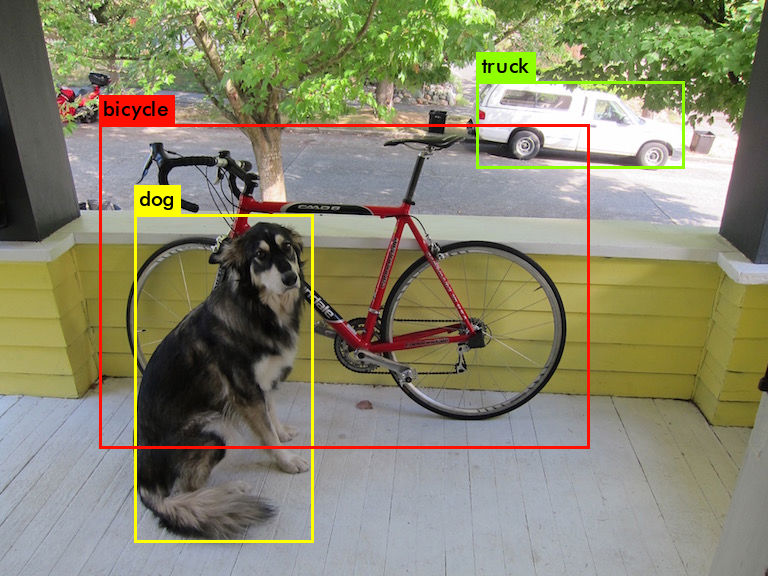

In [ ]:
#pre-trained 된 모델을 가져왔겠다.. 실제로 모델로 inference(추론)를 해보도록 하자.
%cd /content/darknet
#Darknet에서 제공하는 예제 중 가장 유명한 강아지 사진을 가져와(data/dog.jpg) Object Detection을 해보도록 하자.
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

#이미지는 prediction.jpg라는 이름으로 저장된다. 해당 이미지를 주피터 노트북 환경에서 띄우기 위한 함수를 사용하면 yolo가 예측한 이미지를 볼 수 있다.
from IPython.display import Image
Image("predictions.jpg")

In [ ]:
#우리 데이터를 써서 inference 를 해보자 구글에서 적당한 거리뷰 이미지를 다운받아서 평가해 보자
%cd /content/darknet/data
#아래 코드를 실행하면 파일을 업로드 할 수 있는 UI 가 나온다.
from google.colab import files
uploaded = files.upload()

/content/darknet/data


Saving sample3.jpg to sample3.jpg


/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

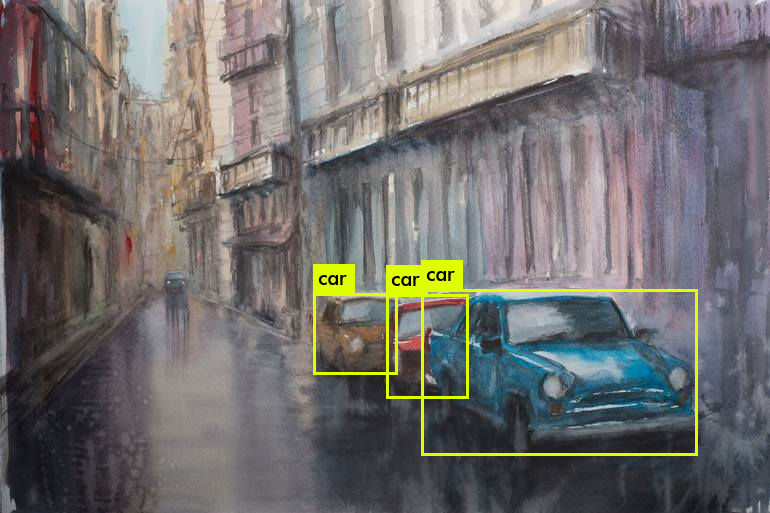

In [ ]:
#업로드된 이미지를 yolov3 를 통해 inference 해보자
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ./data/sample3.jpg

from IPython.display import Image
Image("predictions.jpg")

# Chapter 3. tensorflow, keras 로 구현된 YOLO 코드 

이렇듯, DarkNet 의 접근성 때문에 다크넷 코드를 케라스, 텐서플로우 등으로 변환 하는 시도가 여럿 있습니다.

그중 한 가지 예제를 들고와서 여러분께 소개시켜 드리고자 합니다.

In [ ]:
#먼저 보기 쉽도록 yolo 
#디렉토리를 만들고 그 안으로 이동합니다.
!mkdir yolo
%cd yolo
#github 에 올라와있는 예제 코드를 다운받습니다.
!git clone https://github.com/zzh8829/yolov3-tf2.git
#자동으로 생성된 디렉토리 안으로 들어갑니다.
%cd yolov3-tf2/
#wget 명령어는 리눅스 상에서 특정 웹에 있는 파일을 다운받을때 주로 쓰입니다. 해당 코드에서는 기존 제작자의 홈페이지에서 yolo v3 웨잇을 다운로드 받습니다.
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
#github 에 받은 코드중에 다크넷의 웨잇을 케라스, 텐서플로우로 바꿀 수 코드가 convert.py 로 주어집니다. 
!python convert.py --weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

/content/darknet/yolo
Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 400 (delta 1), reused 1 (delta 0), pack-reused 394
Receiving objects: 100% (400/400), 4.23 MiB | 26.55 MiB/s, done.
Resolving deltas: 100% (231/231), done.
/content/darknet/yolo/yolov3-tf2
--2021-02-02 06:02:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  5.31MB/s    in 48s     

2021-02-02 06:03:21 (4.92 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

2021-02-02 06:03:22.227857: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dyn

2021-02-02 06:05:01.668092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-02 06:05:03.614117: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-02 06:05:03.615014: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-02 06:05:03.625557: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-02-02 06:05:03.625612: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e9d27def6bd0): /proc/driver/nvidia/version does not exist
2021-02-02 06:05:03.651092: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
I0202 06:05:07.294925 139624296531840 detect.py:35] weights loaded
I0202 06:

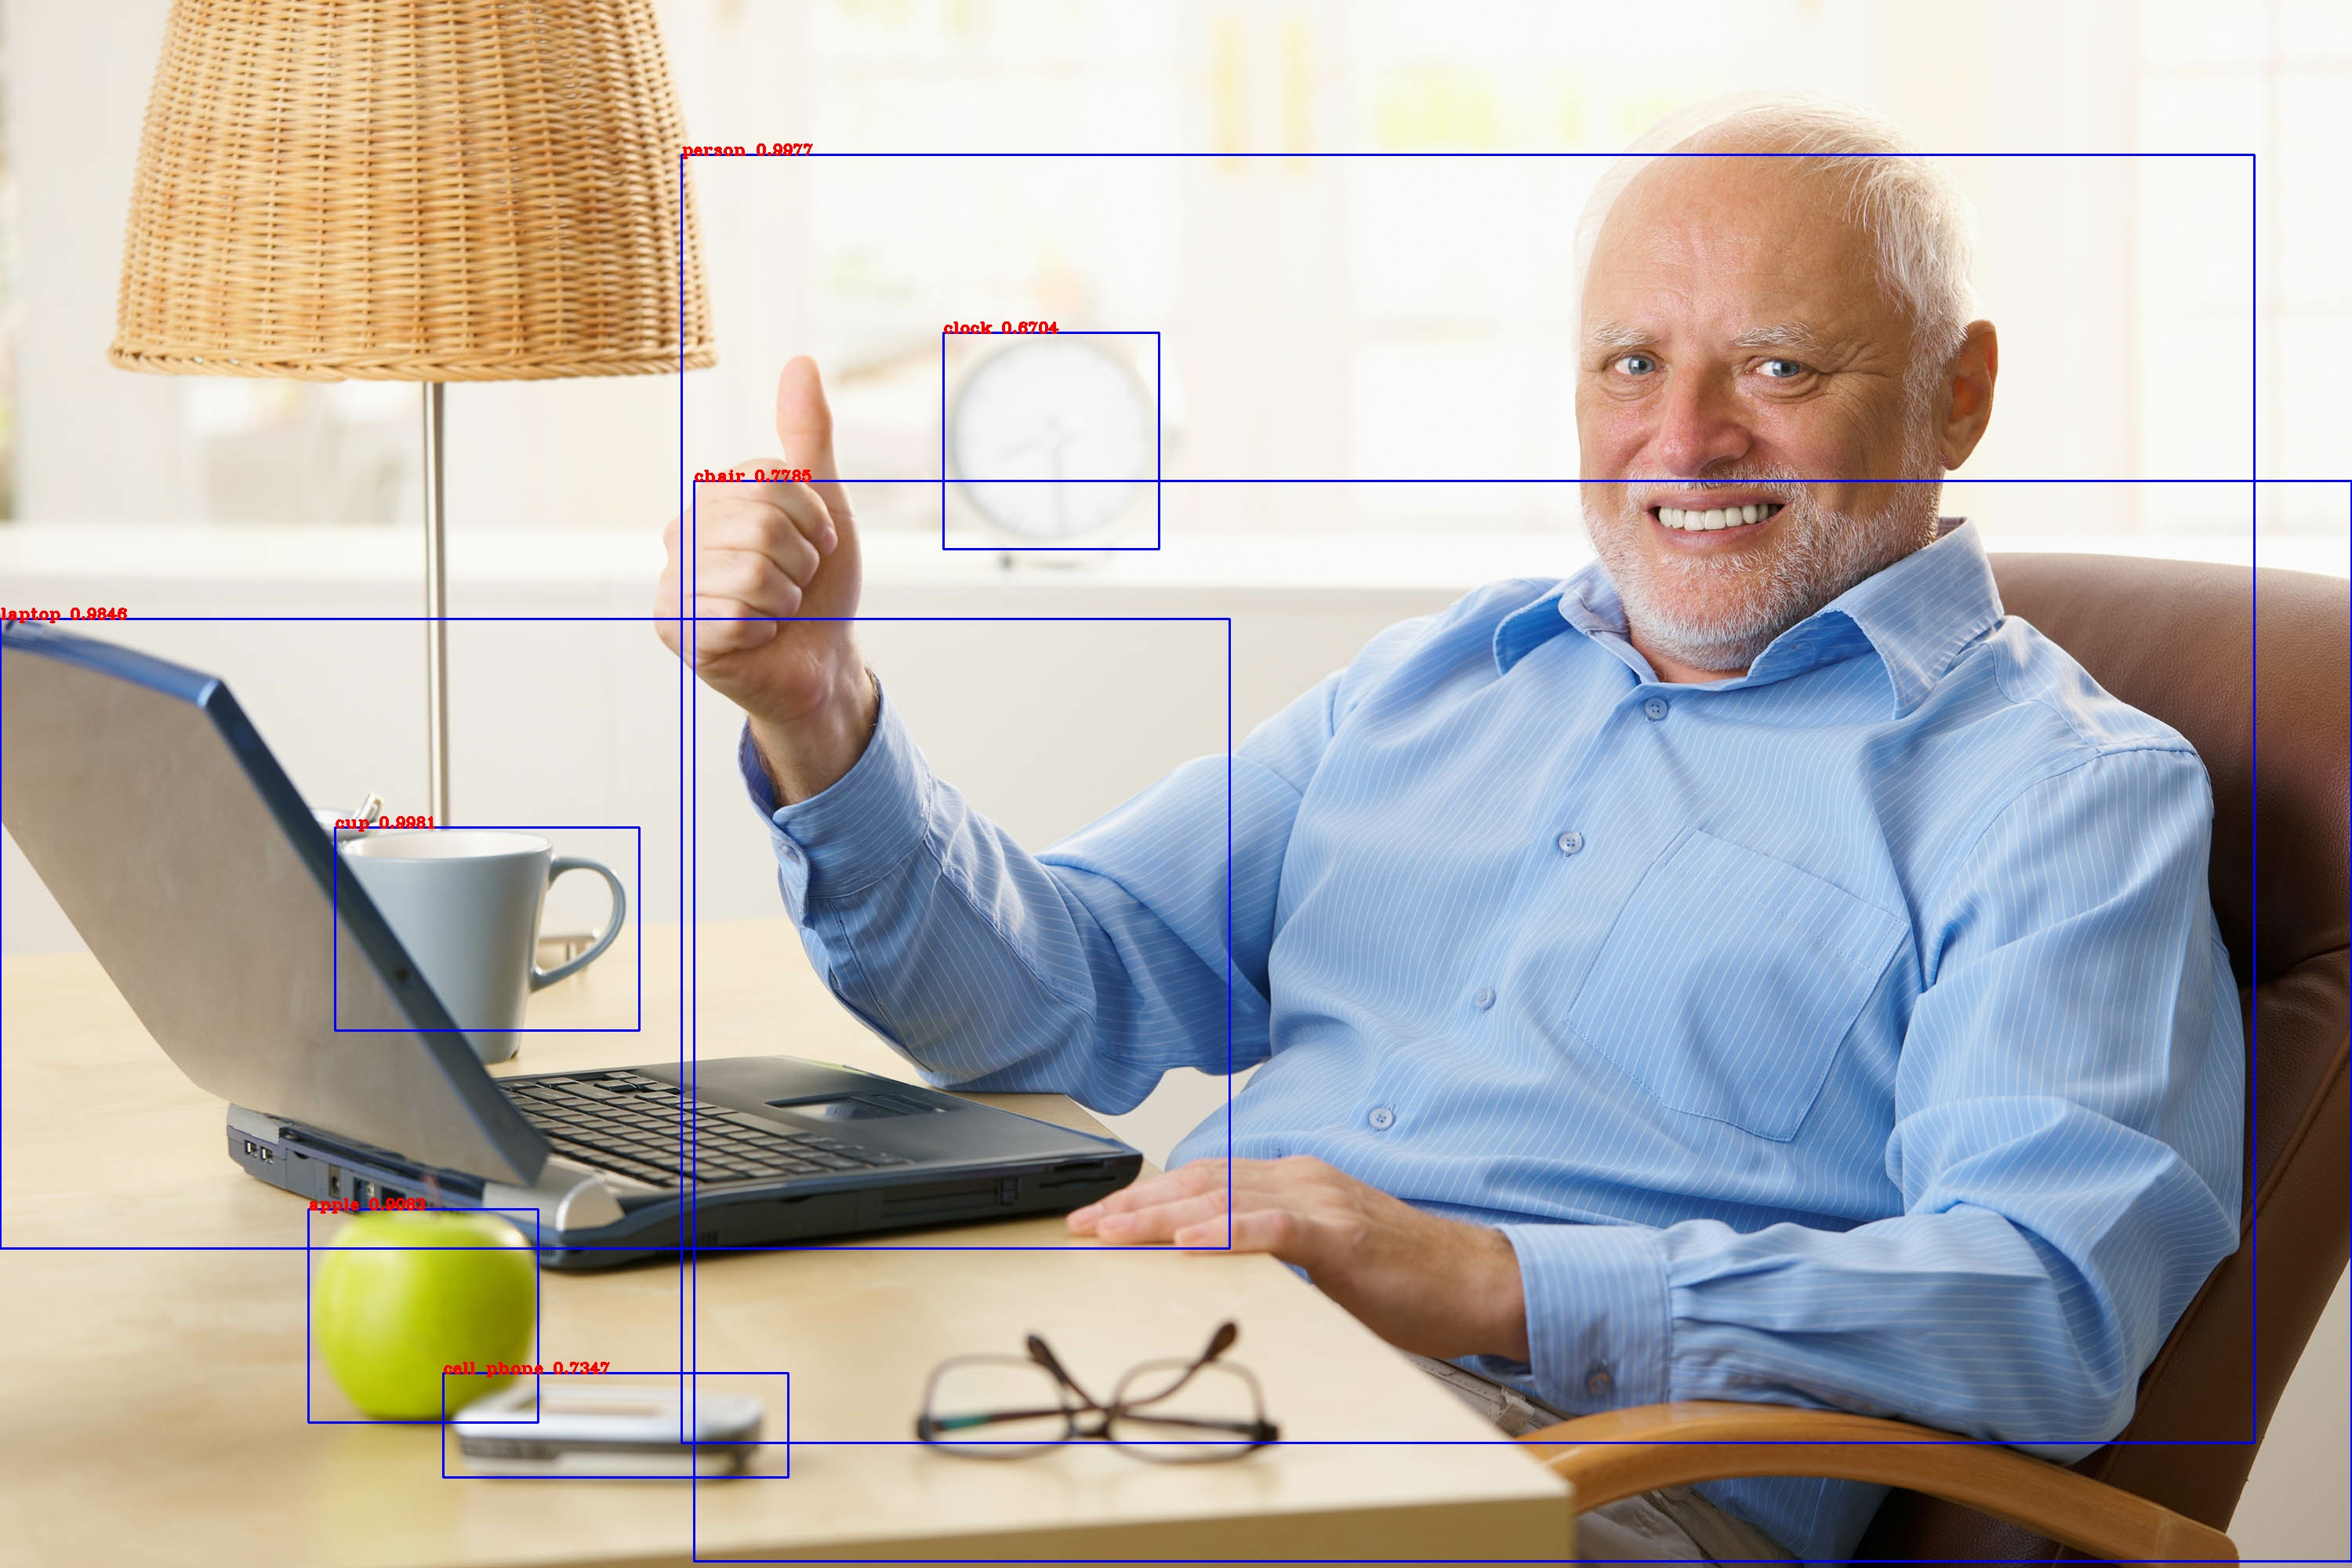

In [ ]:
#Convert 가 끝났다면, 데이터 폴더에 들어있느 예제 meme.jpg 파을을 inference 해봅시다.
!python detect.py --image ./data/meme.jpg
from IPython.display import Image
Image("output.jpg")

In [ ]:
#커스텀 데이터를 업로드 하여 inference 해 봅시다.먼저 data 디렉토리로 이동합니다.
%cd data
from google.colab import files
uploaded = files.upload()

!python detect.py --image ./data/####.jpg

/content/yolo/yolov3-tf2/data


KeyboardInterrupt: ignored

#직접 Training 해보자

computing power 가 모자라서 안됩니다. 개인용 gpu 혹은 서버가 있는경우 시도해 보세요

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -O ./data/voc2012_raw.tar
!mkdir -p ./data/voc2012_raw
!tar -xf ./data/voc2012_raw.tar -C ./data/voc2012_raw
!ls ./data/voc2012_raw/VOCdevkit/VOC2012 # Explore the dataset

--2021-02-02 06:07:55--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘./data/voc2012_raw.tar’

./data/voc2012_raw.  21%[===>                ] 412.77M  13.6MB/s    eta 1m 54s ^C
^C
Annotations  ImageSets	JPEGImages


In [ ]:
!python tools/voc2012.py \
  --data_dir './data/voc2012_raw/VOCdevkit/VOC2012' \
  --split train \
  --output_file ./data/voc2012_train.tfrecord

!python tools/voc2012.py \
  --data_dir './data/voc2012_raw/VOCdevkit/VOC2012' \
  --split val \
  --output_file ./data/voc2012_val.tfrecord

2021-02-02 00:52:09.379581: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0202 00:52:11.718280 140138799294336 voc2012.py:92] Class mapping loaded: {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
I0202 00:52:11.719222 140138799294336 voc2012.py:97] Image list loaded: 5717
100% 5717/5717 [00:06<00:00, 889.79it/s] 
I0202 00:52:18.150795 140138799294336 voc2012.py:106] Done
2021-02-02 00:52:18.906077: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0202 00:52:21.034646 139662480197504 voc2012.py:92] Class mapping loaded: {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow':

In [ ]:
!python train.py \
	--dataset ./data/voc2012_train.tfrecord \
	--val_dataset ./data/voc2012_val.tfrecord \
	--classes ./data/voc2012.names \
	--num_classes 20 \
	--mode fit --transfer none \
	--batch_size 16 \
	--epochs 5 \

2021-02-02 01:53:46.661104: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Traceback (most recent call last):
  File "train.py", line 4, in <module>
    import tensorflow as tf
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 41, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/__init__.py", line 41, in <module>
    from tensorflow.python.eager import context
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/eager/context.py", line 29, in <module>
    import numpy as np
  File "/usr/local/lib/python3.6/dist-packages/numpy/__init__.py", line 140, in <module>
    from . import core
  File "/usr/local/lib/python3.6/dist-packages/numpy/core/__init__.py", line 101, in <module>
    from . import _internal
  File "/usr/local/lib/python3.6/dist-packages/numpy/core/_internal.py", line 10,

#Assignment

Easy

1) Inference Your own custom data(image) for every 20 class and 5 non-class image


Hard

2) Describe YOLO v3 network. (Darknet53) compare it with ResNet-101, 152



Challenging(Optional)

3) Design Vgg-19 net and Darknet-19 and compare its inference time